<a href="https://colab.research.google.com/github/NATTAWUTI/Assignment_NIDA/blob/main/Assignment_Stock_forecast_6610422023_NATTAWUT_I.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://www.ultimatepython.co/post/python-yahoo-finance

In [ ]:
!pip install pandas
!pip install numpy
!pip install requests
!pip install lxml
!pip install yfinance
!pip install matplotlib


In [ ]:
!wget http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz
!tar -xzvf ta-lib-0.4.0-src.tar.gz
%cd ta-lib/
!./configure --prefix=/usr
!make
!make install

In [ ]:
%cd ../
# Install the TA-Lib Python wrapper
!pip install TA-Lib


/content


In [ ]:
import yfinance as yf
import pandas as pd
import matplotlib
import numpy as np
from sklearn.linear_model import LogisticRegression ## LogisticRegression
from sklearn.metrics import accuracy_score  ## value model LogisticRegression
import matplotlib.pyplot as plt  ##graph
import talib as ta

/usr/local/lib/python3.10/dist-packages/yfinance/base.py:48: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  _empty_series = pd.Series()


In [20]:
# mbk = yf.Ticker('IVL.bk')
# interval = '1d'
# start = '2022-1-1'
# end = '2023-1-31'
# mbk_price_df = mbk.history(interval=interval,start=start,end=end)
# mbk_price_df

mbk_price_df = yf.download('IVL.BK', start='2022-01-01', end='2023-12-31', interval='1d')
mbk_price_df.head(5)

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-01-04,43.75,44.00,43.25,43.50,40.545616,15076900
2022-01-05,43.75,45.75,43.75,45.75,42.642803,62826500
2022-01-06,45.75,45.75,44.75,45.25,42.176758,35218600
2022-01-07,45.50,46.50,44.25,45.50,42.409782,47598500
2022-01-10,45.75,46.00,45.25,45.50,42.409782,12724600


In [21]:
mbk_price_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 484 entries, 2022-01-04 to 2023-12-28
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       484 non-null    float64
 1   High       484 non-null    float64
 2   Low        484 non-null    float64
 3   Close      484 non-null    float64
 4   Adj Close  484 non-null    float64
 5   Volume     484 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 26.5 KB


<Axes: xlabel='Date'>

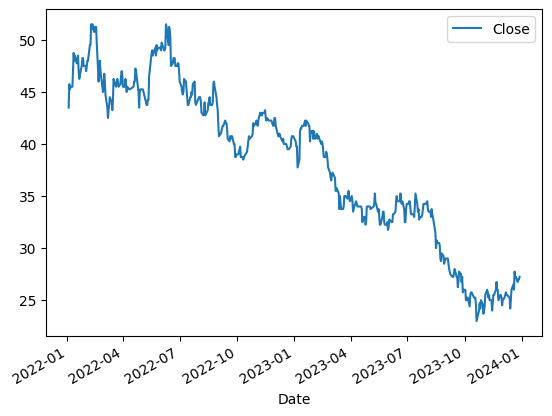

In [22]:
##test sample close

mbk_price_df.loc[:,['Close']].plot()


##A.โดย น.ศ. สามารถเลือกหุ้น (ทั่วโลก) ได้ตามใจชอบมา 1 หุ้น และจะใช้ data ย้อนหลังกี่วันก็ได้ แต่ time frame (window) ต้องเป็น 1 ชั่วโมงเหมือนกันทุกคน (ตามที่กำหนดไว้ใน starter kit link ข้างบน) แล้วแสดงผลลัพธ์ของกราฟ


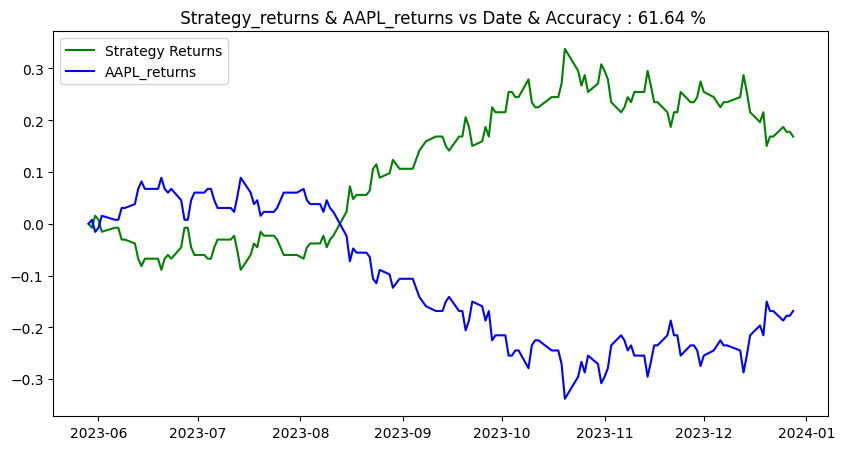

In [23]:
##A.โดย น.ศ. สามารถเลือกหุ้น (ทั่วโลก) ได้ตามใจชอบมา 1 หุ้น และจะใช้ data ย้อนหลังกี่วันก็ได้ แต่ time frame (window) ต้องเป็น 1 ชั่วโมงเหมือนกันทุกคน (ตามที่กำหนดไว้ใน starter kit link ข้างบน) แล้วแสดงผลลัพธ์ของกราฟ


x=mbk_price_df.iloc[:,:4]
y = np.where(mbk_price_df['Close'].shift(-1) > mbk_price_df['Close'],1,-1)
##split 70%
split = int(0.7*len(mbk_price_df))
X_train, X_test, y_train, y_test = x[:split], x[split:], y[:split], y[split:]
##regression
model = LogisticRegression()
model = model.fit (X_train,y_train)

# Calculate the accuracy
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
## print(f"Accuracy: {accuracy:.4f}")

##plot grap ex1
mbk_price_df['Predicted_Signal'] = model.predict(x)
mbk_price_df['AAPL_returns'] = np.log(mbk_price_df['Close']/mbk_price_df['Close'].shift(1))
Cumulative_AAPL_returns = np.cumsum(mbk_price_df[split:]['AAPL_returns'])


mbk_price_df['Strategy_returns'] = mbk_price_df['AAPL_returns']* mbk_price_df['Predicted_Signal'].shift(1)
Cumulative_Strategy_returns = np.cumsum(mbk_price_df[split:]['Strategy_returns'])
plt.figure(figsize=(10,5))
plt.title(f" Strategy_returns & AAPL_returns vs Date & Accuracy : {accuracy * 100:.2f} %", fontdict=None, loc='center', pad=None)
plt.plot(Cumulative_Strategy_returns, color='g', label = 'Strategy Returns')
plt.plot(Cumulative_AAPL_returns, color='b', label = 'AAPL_returns')
plt.legend()
plt.show()

#B.เพิ่ม feature (column) ต่างๆ ที่เราสนใจ จากนั้นให้ทำซ้ำตามข้อ (a.) แล้วแสดงผลลัพธ์ของกราฟเปรียบเทียบกับกราฟในข้อ a.

In [28]:
##B.เพิ่ม feature (column) ต่างๆ ที่เราสนใจ จากนั้นให้ทำซ้ำตามข้อ (a.) แล้วแสดงผลลัพธ์ของกราฟเปรียบเทียบกับกราฟในข้อ a.

mbk_price_df_B =mbk_price_df.copy()
mbk_price_df_B.head(2)

,Open,High,Low,Close,Adj Close,Volume,Predicted_Signal,AAPL_returns,Strategy_returns
Date,,,,,,,,,
2022-01-04,43.75,44.00,43.25,43.50,40.545616,15076900,-1,NaN,NaN
2022-01-05,43.75,45.75,43.75,45.75,42.642803,62826500,-1,0.050431,-0.050431


In [29]:
mbk_price_df_B.drop(['Predicted_Signal','AAPL_returns','Strategy_returns'], axis=1, inplace=True)
##mbk_price_df_B
mbk_price_df_B['S_10'] = mbk_price_df_B['Close'].rolling(window=10).mean()
mbk_price_df_B['Corr'] = mbk_price_df_B['Close'].rolling(window=10).corr(mbk_price_df_B['S_10'])
mbk_price_df_B['RSI'] = ta.RSI(np.array(mbk_price_df_B['Close']), timeperiod =10)
mbk_price_df_B['Open-Close'] = mbk_price_df_B['Open'] - mbk_price_df_B['Close'].shift(1)
mbk_price_df_B['Open-Open'] = mbk_price_df_B['Open'] - mbk_price_df_B['Open'].shift(1)

mbk_price_df_B.dropna(inplace=True)  ##drop na
mbk_price_df_B.head(2)

,Open,High,Low,Close,Adj Close,Volume,S_10,Corr,RSI,Open-Close,Open-Open
Date,,,,,,,,,,,
2022-01-28,48.5,48.5,47.25,47.5,44.273952,8443500,47.625,-0.165846,61.126753,0.25,0.75
2022-01-31,48.0,48.0,47.50,47.5,44.273952,9945500,47.600,-0.193972,61.126753,0.50,-0.50


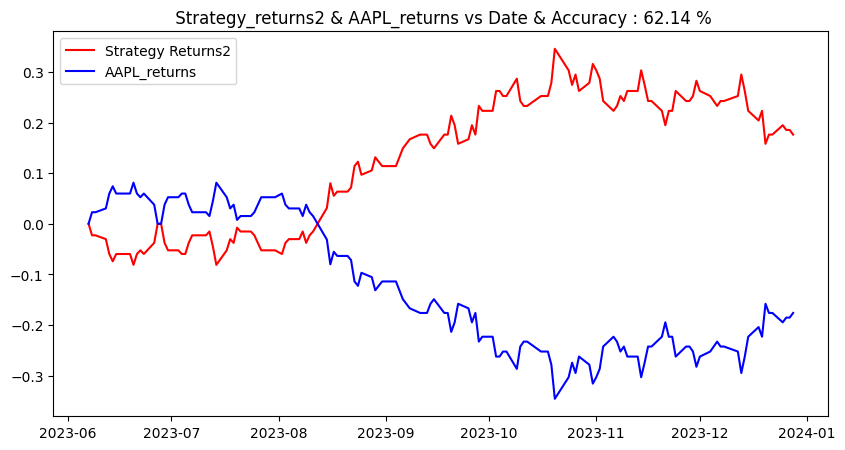

In [30]:
x2=mbk_price_df_B.iloc[:,:]
y2 = np.where(mbk_price_df_B['Close'].shift(-1) > mbk_price_df_B['Close'],1,-1)
##split 70%
split2 = int(0.7*len(mbk_price_df_B))
X_train2, X_test2, y_train2, y_test2 = x2[:split2], x2[split2:], y2[:split2], y2[split2:]

##regression
model2 = LogisticRegression()
model22 = model2.fit (X_train2,y_train2)

# Calculate the accuracy
y_pred2 = model22.predict(X_test2)
accuracy2 = accuracy_score(y_test2, y_pred2)
## print(f"Accuracy: {accuracy:.4f}")

##plot grap ex1
mbk_price_df_B['Predicted_Signal2'] = model2.predict(x2)
mbk_price_df_B['AAPL_returns'] = np.log(mbk_price_df_B['Close']/mbk_price_df_B['Close'].shift(1))
Cumulative_AAPL_returns = np.cumsum(mbk_price_df_B[split2:]['AAPL_returns'])


mbk_price_df_B['Strategy_returns2'] = mbk_price_df_B['AAPL_returns']* mbk_price_df_B['Predicted_Signal2'].shift(1)
Cumulative_Strategy_returns2 = np.cumsum(mbk_price_df_B[split2:]['Strategy_returns2'])
plt.figure(figsize=(10,5))
plt.title(f" Strategy_returns2 & AAPL_returns vs Date & Accuracy : {accuracy2 * 100:.2f} %", fontdict=None, loc='center', pad=None)
plt.plot(Cumulative_Strategy_returns2, color='r', label = 'Strategy Returns2')
plt.plot(Cumulative_AAPL_returns, color='b', label = 'AAPL_returns')
plt.legend()
plt.show()

##Total Strategy_returns & Strategy_returns2 & AAPL_returns vs Date & Accuracy
##Strategy_returns == nomal & not add column
##Strategy_returns2 == nomal &  add column  column
##AAPL_returns  == Accuracy of close stock

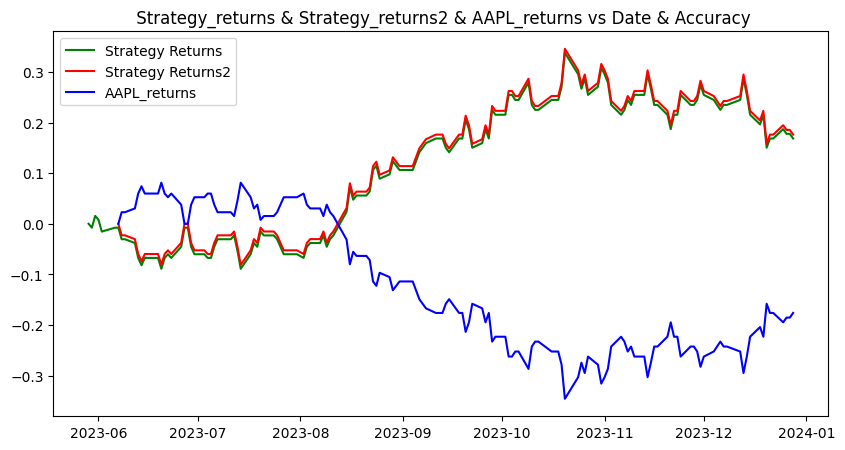

In [31]:
plt.figure(figsize=(10,5))
plt.title(f" Strategy_returns & Strategy_returns2 & AAPL_returns vs Date & Accuracy", fontdict=None, loc='center', pad=None)
plt.plot(Cumulative_Strategy_returns, color='g', label = 'Strategy Returns')
plt.plot(Cumulative_Strategy_returns2, color='r', label = 'Strategy Returns2')
plt.plot(Cumulative_AAPL_returns, color='b', label = 'AAPL_returns')
plt.legend()
plt.show()